In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from GLM_regression import *
plt.rcParams.update({'font.size': 12,
                     'axes.spines.right': False,
                     'axes.spines.top':   False,
                     'legend.frameon':    False,})

### 1. Choose which dataset to use

 All datasets must be in the "datasets" folder.

In [2]:
#filename = "SSTindivsomata_GLM"
filename = "NDNFindivsomata_GLM"
# filename = "EC_GLM"

filepath = os.path.join("datasets", filename+".mat")
reorganized_data, variable_list = preprocess_data(filepath)
GLM_params = fit_GLM(reorganized_data, quintile=None, regression='ridge')

### 2. (Optional) Filter the data

Skip this cell if you want to include all neurons in the analysis.

For example, you can keep only the cells with GLM prediction R<sup>2</sup> > 0.8, or the top 20% of cells based on Velocity weights.

In [3]:
reorganized_data, GLM_params= filter_neurons_by_metric(reorganized_data, GLM_params, variable_list, 
                                                       metric = 'R2',        # Options: 'R2', 'trial correlations', 'Licks', 'Reward_loc', 'Velocity', '#1', '#2', etc.
                                                       threshold = 0.8, 
                                                       scale_type = 'value', # Options: 'value', 'percentile', 'std'
                                                       keep = 'top'          # Options: 'top', 'bottom'
                                                       )

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

### 3. Visualize the data

The animal and cell numbers are based on your original dataset, so e.g. 'cell_1' does not exist because it has been removed from the data.

(Any cell with all zeros or all NaNs is automatically removed.)

pearson R2 across all trials: 0.3024649251711134
pearson R2 (average prediction vs average activity): 0.9611549124994218


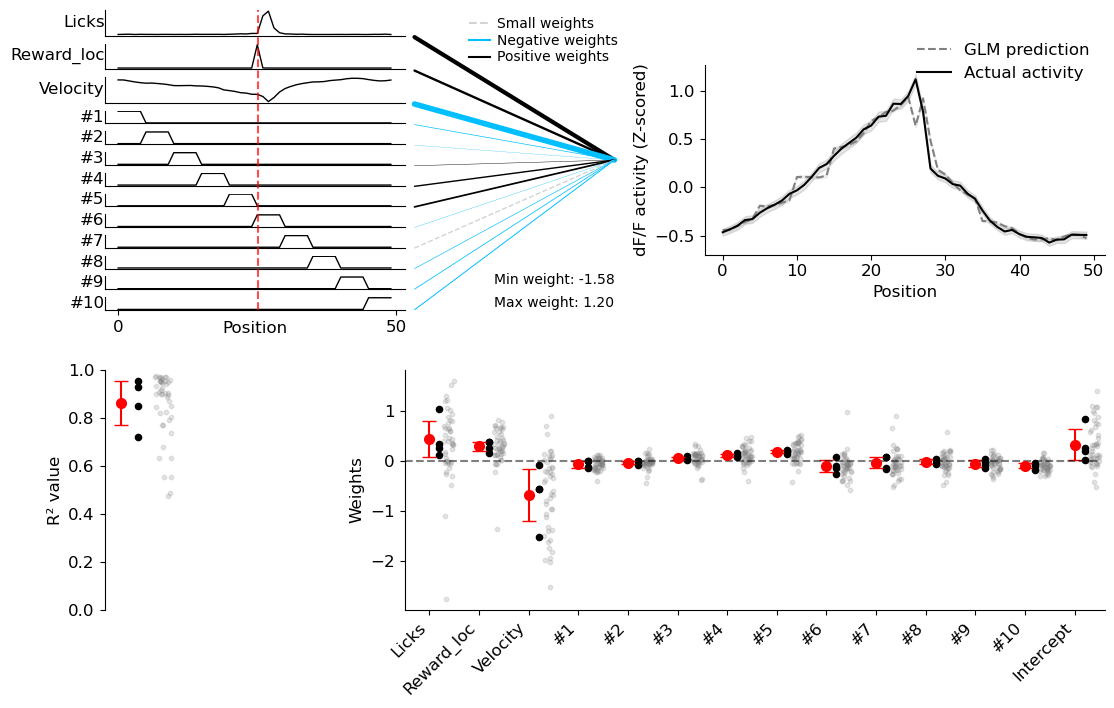

In [3]:
plot_combined_figure(reorganized_data, GLM_params, variable_list, model_name=filename, sort_by='R2', save=False)
# plot_combined_figure(reorganized_data, GLM_params, variable_list, model_name=filename, animal='animal_2', cell='cell_3', save=False)

Top neuron for Reward_loc, with weight: -1.3533126403131535
Best neuron: cell_5, animal_2
pearson R2 across all trials: 0.16020531433425064
pearson R2 (average prediction vs average activity): 0.8863799227692739
pearson R2 across all trials: 0.12111775385044152
pearson R2 (average prediction vs average activity): 0.9460263210655319


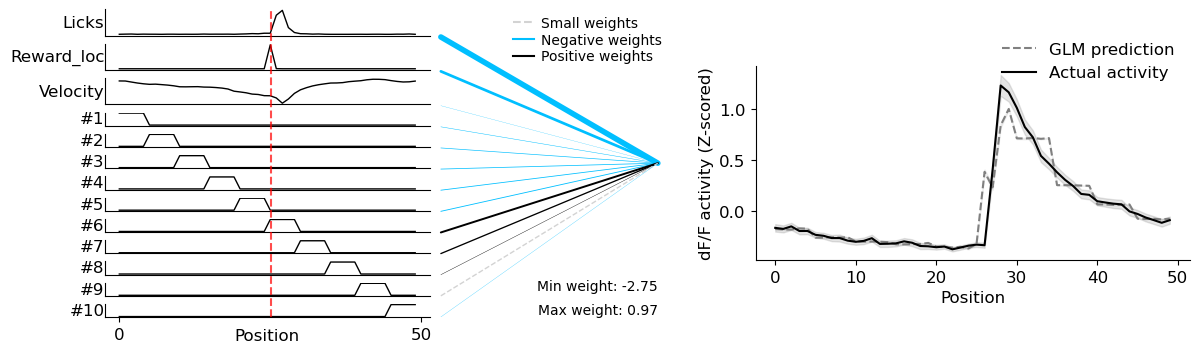

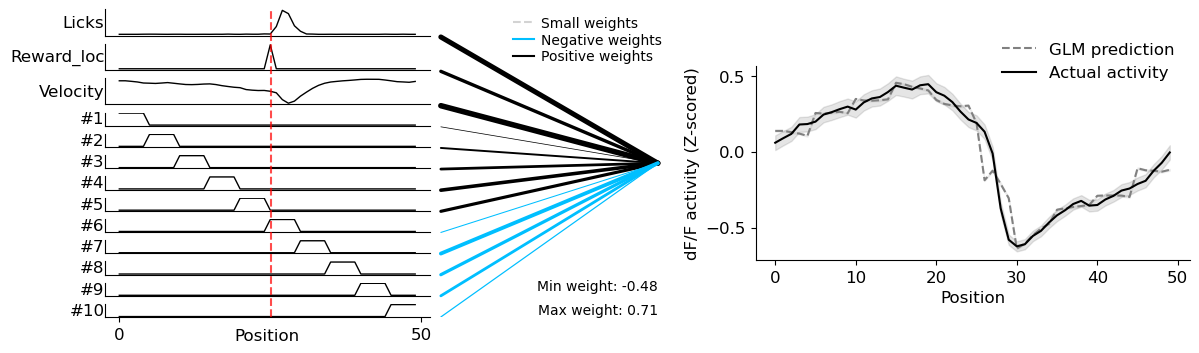

In [5]:
'''
If you want to visualize the GLM results for a specific example neuron, you can either specify the animal and cell number, 
or pick the top neuron based on a specific metric (such as weight for Reward_loc)
'''

plot_example_neuron(reorganized_data, GLM_params, variable_list, sort_by="Reward_loc")
plot_example_neuron(reorganized_data, GLM_params, variable_list, animal='animal_4', cell='cell_3')

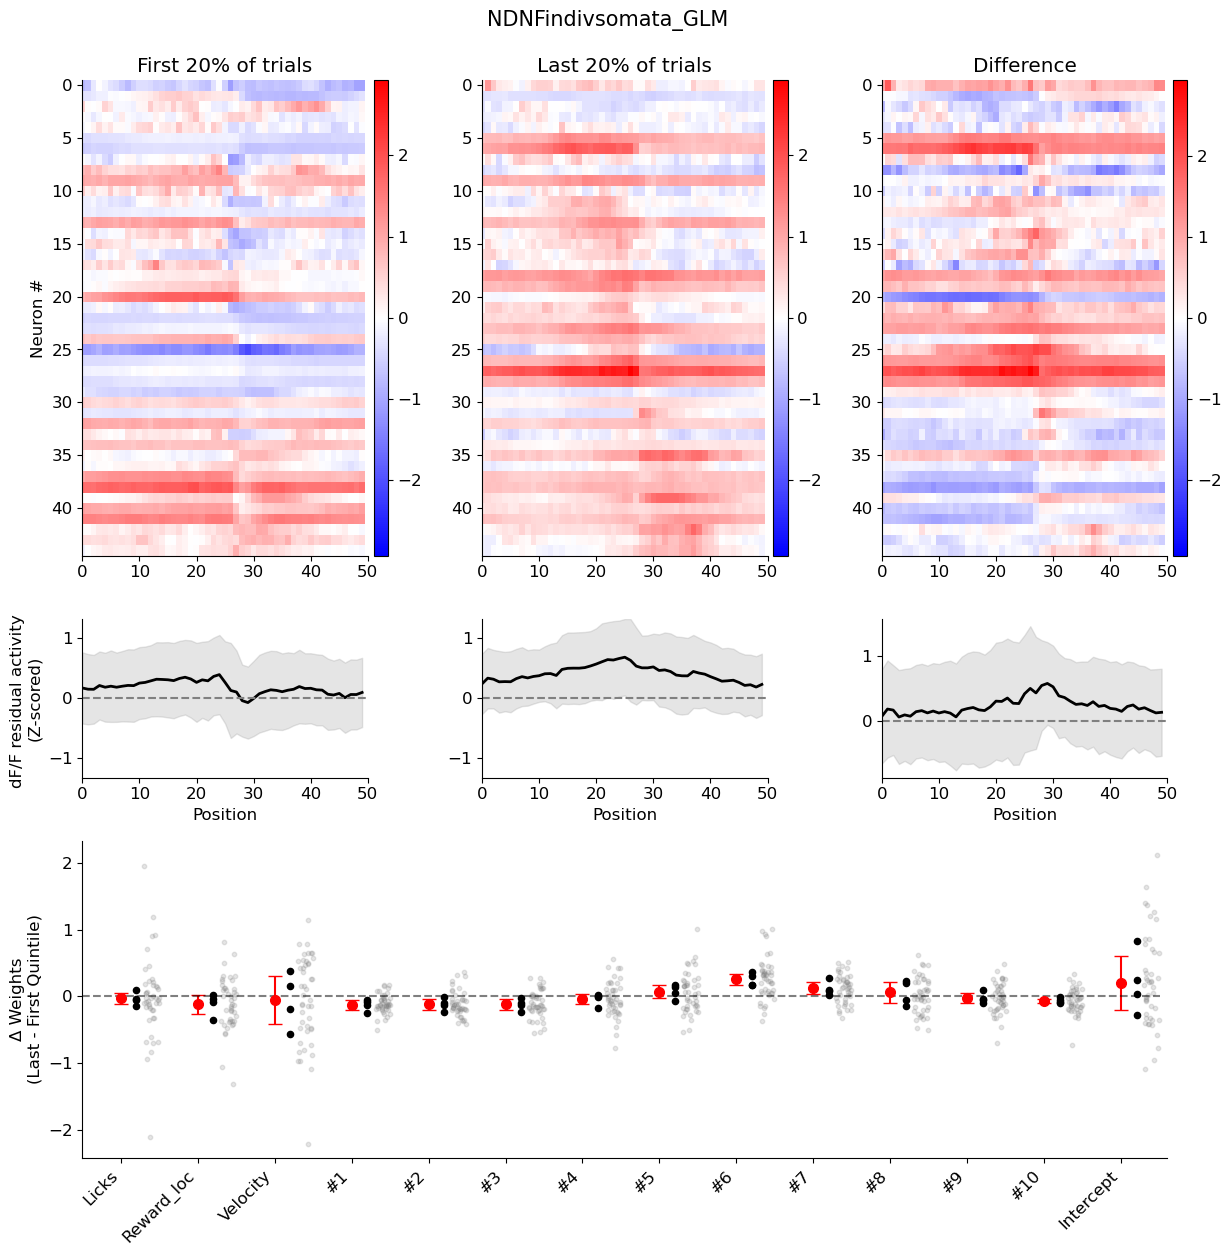

In [4]:
'''
Visualize the dF/F traces after subtracting the GLM prediction based on only Velocity (all other weights+intercept set to 0).
The dF/F data is Z-scored across all trials, and the 2 GLMs are trained on different subsets of this data.
You can compare any 2 quintiles of the data.
'''

plot_quintile_comparison(reorganized_data, variable_list, filename, quintiles=(1,5), save=False)

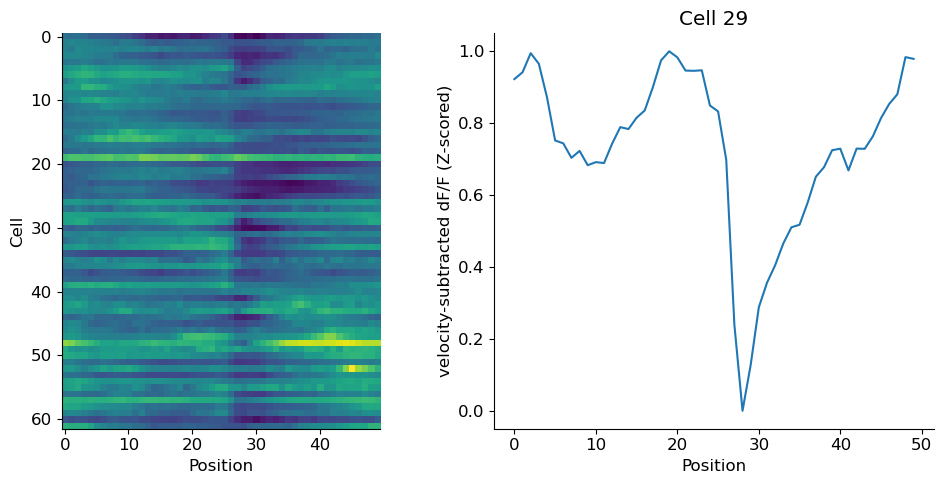

In [52]:
cell = 29

avg_residuals, GLM_params = compute_velocity_subtracted_residuals(reorganized_data, variable_list, quintile=3)
sort_idx = np.argsort(np.argmax(avg_residuals, axis=1))
sorted_avg_residuals = avg_residuals[sort_idx]

# Renormalize between 0 and 1
cell_residual = sorted_avg_residuals[cell]
cell_residual = (cell_residual - np.min(cell_residual)) / (np.max(cell_residual) - np.min(cell_residual))

fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(sorted_avg_residuals, aspect='equal', cmap='viridis', interpolation='none')
ax[0].set_xlabel('Position')
ax[0].set_ylabel('Cell')

ax[1].plot(cell_residual)
ax[1].set_xlabel('Position')
ax[1].set_ylabel('velocity-subtracted dF/F (Z-scored)')
ax[1].set_title('Cell %d' % cell)

plt.tight_layout()
plt.show()